In [9]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
from scipy.stats import boxcox
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas import DataFrame
from pandas import Grouper
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from collections import Counter
sns.set_style('darkgrid')
# from dataprep.eda import plot, plot_correlation, plot_missing, create_report
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [10]:
# tỉ lệ 8:2
df = pd.read_csv('NVL Historical Data 1_6.csv')
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df['Price'].str.replace(',', '')
# Chuyển sang dạng số
df = pd.to_numeric(df)
df = df[::-1]

df = df.reset_index(drop=True) # Reset the index

In [11]:
scaler = StandardScaler()
df1 = scaler.fit_transform(np.array(df).reshape(-1, 1))


In [12]:
# Assuming df is your DataFrame containing your data
train_size = int(0.8 * len(df))

# Split the data into training and testing sets
train_data = df1[:train_size]
test_data = df1[train_size:]



In [13]:
train_data
test_data.shape

(320, 1)

In [14]:
# !pip install tbats

In [15]:
from tbats import BATS, TBATS
# 3. Quá trình Training
y_train = np.array(train_data)

estimator = TBATS(
    seasonal_periods=[12, 30.25],
    use_arma_errors=True,
    use_box_cox=True
)
model = estimator.fit(y_train)


In [16]:
# 4. Quá trình testing
y_test = np.array(test_data)
y_pred =  model.forecast(steps=350)

In [17]:
print(y_pred[-30:])

[-1.32666904 -1.32666904 -1.32666904 -1.32666904 -1.32666904 -1.32666904
 -1.32666904 -1.32666904 -1.32666904 -1.32666904 -1.32666904 -1.32666904
 -1.32666904 -1.32666904 -1.32666904 -1.32666904 -1.32666904 -1.32666904
 -1.32666904 -1.32666904 -1.32666904 -1.32666904 -1.32666904 -1.32666904
 -1.32666904 -1.32666904 -1.32666904 -1.32666904 -1.32666904 -1.32666904]


In [18]:

y_next_30_days = y_pred[-30:]
y_pred = y_pred[:320]
print(y_pred)
print(y_next_30_days)

[-1.25116638 -1.25562787 -1.25982572 -1.26377551 -1.26749192 -1.27098872
 -1.27427889 -1.27737464 -1.28028747 -1.28302817 -1.28560693 -1.28803331
 -1.29031631 -1.2924644  -1.29448557 -1.2963873  -1.29817666 -1.29986029
 -1.30144443 -1.30293496 -1.30433742 -1.305657   -1.30689861 -1.30806685
 -1.30916606 -1.31020032 -1.31117346 -1.3120891  -1.31295064 -1.31376126
 -1.31452399 -1.31524164 -1.31591689 -1.31655224 -1.31715005 -1.31771253
 -1.31824177 -1.31873974 -1.31920829 -1.31964914 -1.32006395 -1.32045425
 -1.32082148 -1.32116702 -1.32149213 -1.32179804 -1.32208587 -1.32235669
 -1.32261151 -1.32285127 -1.32307686 -1.32328913 -1.32348885 -1.32367676
 -1.32385358 -1.32401995 -1.32417648 -1.32432377 -1.32446235 -1.32459274
 -1.32471543 -1.32483087 -1.32493949 -1.32504169 -1.32513785 -1.32522833
 -1.32531346 -1.32539356 -1.32546893 -1.32553984 -1.32560657 -1.32566935
 -1.32572842 -1.325784   -1.3258363  -1.32588551 -1.32593181 -1.32597537
 -1.32601636 -1.32605493 -1.32609121 -1.32612536 -1

In [19]:
train_data = df[:train_size]
test_data = df[train_size:]
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_next_30_days = scaler.inverse_transform(y_next_30_days.reshape(-1, 1))


In [20]:
test_mae = mean_absolute_error(test_data, y_pred)
test_mape = mean_absolute_percentage_error(test_data, y_pred)
test_rmse = sqrt(mean_squared_error(test_data, y_pred))

print('MAE:', test_mae)
print('RMSE:', test_rmse)
print('MAPE:', test_mape)


MAE: 5735.102886150562
RMSE: 6267.972727002858
MAPE: 0.35050838267275264


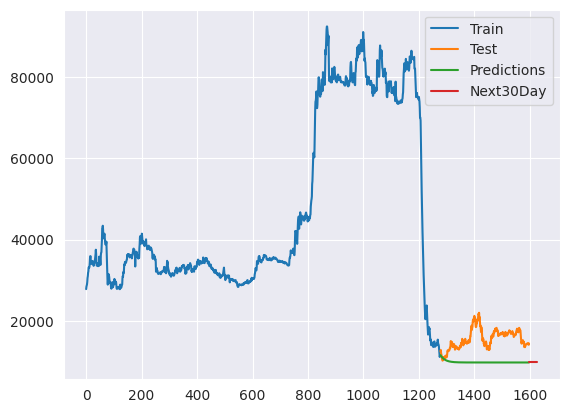

In [21]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()